<a href="https://colab.research.google.com/github/ejr271292/Proyecto/blob/main/ProyectoDS_Parte1_Ruiz_Emanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de producción de biodiesel y venta a petroleras para su posterior corte en gasoil 💡


**Contexto empresarial:** El presente documento tiene por fin analizar la producción en toneladas de biodiesel en Argentina. Toneladas que son vendidas por empresas de distinto tamaño a petroleras para su posterior corte y venta como gasoil.

Actualmente por ley 27.640 de biocombustibles, se establece un corte con biodiesel del 5% para el gasoil.

La fuente utilizada proviene de datos abiertos del gobierno nacional:
https://www.datos.gob.ar/dataset/energia-estadisticas-biodiesel-bioetanol

Posee registros desde febrero del 2010 a febrero del 2024.

Se han agregado columnas respecto de la fuente original, a los fines de poder contar con más variables importantes para analizar.

Para ello, se han obtenido datos de diversas fuentes como el Banco Nación Argentina o la Secretaría de Energía.


**Contexto analítico:** A través del archivo XLS (Excel) obtenemos registros por mes y año referidos a:

*   Las empresas producturas de biodiesel (variable cualitativa)
*   Localidades y provincias donde se llevan a cabo las producciones (variable cualitativa)

*   Cupos asignados de producción a empresas por parte del gobierno (Secretaría de Energía) (variable cuantitativa)
*   Producción en toneladas de biodiesel (variable cuantitativa)

*   Ventas al corte y otras ventas. Cuando nos referimos a otras ventas tiene que ver con subproductos generados en la producción del principal como la glicerina, borra y ácidos grasos (variables cuantitativas)
*   Precio en pesos argentinos por tonelada de biodiesel (variable cuantitativa)

*   Ventas en miles de pesos (variable cuantitativa)  


*   Cotización oficial tipo vendedor de dólar estadounidense (variable cuantitativa)


*   Ventas en dólares estadounideneses (variable cuantitativa)

*   Compras en toneladas de biodiesel por parte de petroleras (variable cuantitativa)
*   Capacidad de producción de litros de gasoil (variable cuantitativa)

**Observando y analizando nuestra base de datos, nos surgen las siguientes preguntas:**

¿Cuáles son las empresas productoras de biodiesel más importantes? 🔍

¿En qué localidades y provincias se llevan a cabo las mayores producciones? 🔍

¿Cuáles fueron las medias de cupos, producción y ventas? 🔍

¿Qué empresa realizó la mayor producción? 🔍

¿Qué empresa tuvo la mayor venta en toneladas? 🔍

¿Quién tuvo la mayor venta facturada? ¿Coincide la mayor venta en pesos con la mayor en dólares? 🔍

¿Cuáles son las petroleras que realizan las compras de biodiesel? ¿Cuáles son las más importantes? 🔍

¿Qué capacidad en litros de gasoil pueden producir las petroleras en base a las compras de toneladas de biodiesel? 🔍

**Con el fin de poder contestar a las preguntas mencionadas, pondremos en práctica distintas librerías.**


In [6]:
#Importamos librerías para manejo, análisis y visualización de estructuras de datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Cargamos el dataset (archivo excel):
from google.colab import drive
import os
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
biodiesel_df=pd.read_excel('/content/gdrive/MyDrive/Proyecto Final Data Science 1/Estadisticas-biocombustibles.xls')

In [9]:
#Información del df:
print ('Los datos son de tipo:')
biodiesel_df.info()

Los datos son de tipo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5731 entries, 0 to 5730
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   PERÍODO                                   5731 non-null   datetime64[ns]
 1   PRODUCTORA DE BIODIESEL                   5731 non-null   object        
 2   LOCALIDAD                                 5731 non-null   object        
 3   PROVINCIA                                 5731 non-null   object        
 4   CUPO TOTAL ASIGNADO (TN)                  5407 non-null   float64       
 5   PRODUCCIÓN (TN)                           5727 non-null   float64       
 6   VENTAS AL CORTE (TN)                      5731 non-null   float64       
 7   OTRAS VENTAS (TN)                         5731 non-null   float64       
 8   PRECIO EN $ POR TN DE BIODIESEL           5731 non-null   float64       
 9   VENTAS 

Se verifican 3 tipos de datos: datetime64 , object y float64

### Exploración de datos (EDA): 💡

In [10]:
#Tamaño del df:
biodiesel_df.shape



(5731, 30)

Nuestro dataframe cuenta con 5731 filas o registros y 30 columnas o variables.

In [11]:
#Columnas del df:
biodiesel_df.columns

Index(['PERÍODO', 'PRODUCTORA DE BIODIESEL', 'LOCALIDAD', 'PROVINCIA',
       'CUPO TOTAL ASIGNADO (TN)', 'PRODUCCIÓN (TN)', 'VENTAS AL CORTE (TN)',
       'OTRAS VENTAS (TN)', 'PRECIO EN $ POR TN DE BIODIESEL',
       'VENTAS EN MILES DE $ POR TN DE BIODIESEL', 'COT. OFICIAL USD ',
       'VENTAS EN USD POR TN DE BIODIESEL', 'AXION ENERGY ARGENTINA S.A.',
       'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.', 'PETROBRAS ARGENTINA S.A.',
       'PETROLERA DEL CONOSUR S.A.', 'POLIPETROL S.A.',
       'REFINERÍA DEL NORTE S.A.', 'SHELL ARGENTINA C.A.P.S.A.', 'YPF S.A.',
       'OIL COMBUSTIBLES S.A.', 'NEW AMERICAN OIL S.A.', 'REFI PAMPA S.A.',
       'TRAFIGURA ARGENTINA S.A.', 'ENERGÍA ARGENTINA S.A. (ENARSA)',
       'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.', 'PETROIL S.A.',
       'DIVERSE FUELS S.A.', 'PETROLERA DEGAB S.A.',
       'CAP. DE PROD. GASOIL - PETROLERAS (LTS)'],
      dtype='object')

In [12]:
#Definimos un diccionario:
Diccionario = {'PERÍODO' : 'Fechas',
               'PRODUCTORA DE BIODIESEL' : 'Razón social productora',
               'CUPO TOTAL ASIGNADO (TN)' : 'Cupo de venta asignado a cada empresa',
               'PRODUCCIÓN (TN)' : 'Cantidad de tns producidas',
               'VENTAS AL CORTE (TN)' : 'Ventas de biodiesel en tns',
               'OTRAS VENTAS (TN)' : 'Venta de subproductos en tns: glicerina, borra, ácidos grasos',
               'CAP. DE PROD. GASOIL - PETROLERAS (LTS)' : 'Cantidad de lts de gasoil que pueden productir las petroleras en base a las compras de Biodiesel'}

In [13]:
print(Diccionario)

{'PERÍODO': 'Fechas', 'PRODUCTORA DE BIODIESEL': 'Razón social productora', 'CUPO TOTAL ASIGNADO (TN)': 'Cupo de venta asignado a cada empresa', 'PRODUCCIÓN (TN)': 'Cantidad de tns producidas', 'VENTAS AL CORTE (TN)': 'Ventas de biodiesel en tns', 'OTRAS VENTAS (TN)': 'Venta de subproductos en tns: glicerina, borra, ácidos grasos', 'CAP. DE PROD. GASOIL - PETROLERAS (LTS)': 'Cantidad de lts de gasoil que pueden productir las petroleras en base a las compras de Biodiesel'}


In [14]:
#Mostramos todas las columnas:
pd.set_option('display.max_columns', None)


In [15]:
#Primeras 5 filas/registros:
biodiesel_df.head().round(2)


,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.0,367.72,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.0,20451.75,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.0,6878.07,211.62,0.00,3276.0,693.27,3.88,178677.09,0.0,0.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.0,184.81,0.00,221.95,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.0,8662.92,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53


In [16]:
#Modifico el índice del df:
biodiesel_df.set_index("PERÍODO").round(2)

,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
PERÍODO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,3.88,178677.09,0.0,0.0,211.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,NaN,0.00,0.00,0.00,940334.0,0.00,846.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,846.00,271207.44,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,846.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41


In [17]:
biodiesel_df.round(2)

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,3.88,178677.09,0.0,0.0,211.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,NaN,0.00,0.00,0.00,940334.0,0.00,846.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,846.00,271207.44,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,846.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.84,2925.96,3059.54,0.00,940334.0,2876989.49,846.00,3400696.79,1080.5,0.0,0.0,0.0,0.0,0.0,1979.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172115.29


Como vemos que el df original no fue modificado, si quiero cambiar el índice de forma definitiva debería utilizar inplace:

La fórmula sería la siguiente:

biodiesel_df.set_index('PERÍODO', inplace=True)

In [18]:
#Verifico cuantos NaN posee el df en su totalidad:
total_nan = biodiesel_df.isna().sum().sum()
print("Cantidad total de NaN en el DataFrame:", total_nan)

Cantidad total de NaN en el DataFrame: 365


In [19]:
#Verifico cuantos NaN posee el df por columna:
biodiesel_df.isna().sum()

PERÍODO                                       0
PRODUCTORA DE BIODIESEL                       0
LOCALIDAD                                     0
PROVINCIA                                     0
CUPO TOTAL ASIGNADO (TN)                    324
PRODUCCIÓN (TN)                               4
VENTAS AL CORTE (TN)                          0
OTRAS VENTAS (TN)                             0
PRECIO EN $ POR TN DE BIODIESEL               0
VENTAS EN MILES DE $ POR TN DE BIODIESEL      0
COT. OFICIAL USD                              0
VENTAS EN USD POR TN DE BIODIESEL             0
AXION ENERGY ARGENTINA S.A.                   0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.         0
PETROBRAS ARGENTINA S.A.                      0
PETROLERA DEL CONOSUR S.A.                   35
POLIPETROL S.A.                               0
REFINERÍA DEL NORTE S.A.                      0
SHELL ARGENTINA C.A.P.S.A.                    0
YPF S.A.                                      0
OIL COMBUSTIBLES S.A.                   

Como vemos, nuestra base de datos cuenta con 365 NaN sobre un total de 171.930 valores del df.

Si bien no representa un número significativo sobre la cantidad total de valores de nuestro df, debemos saber que la mayoría de esos NaN provienen únicamente de la columna "CUPO TOTAL ASIGNADO (TN).

Sería conveniente poder realizar un muestreo, analizar posibles causales de esos NaN y así poder corregirlos a futuro.

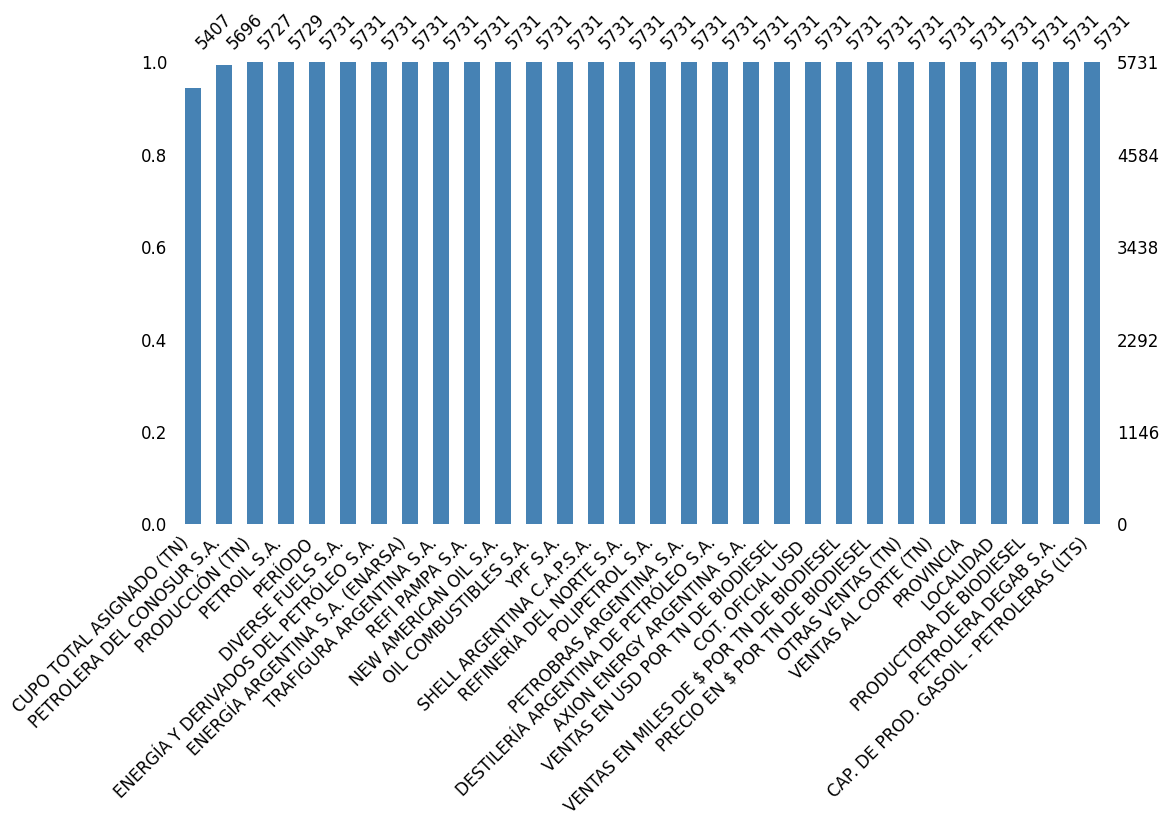

In [20]:
#Gráfico de valores perdidos utilizanzo librería "missingno":
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(biodiesel_df, figsize=(12, 6), sort="ascending", fontsize=12, color='steelblue')

plt.show()

<Axes: >

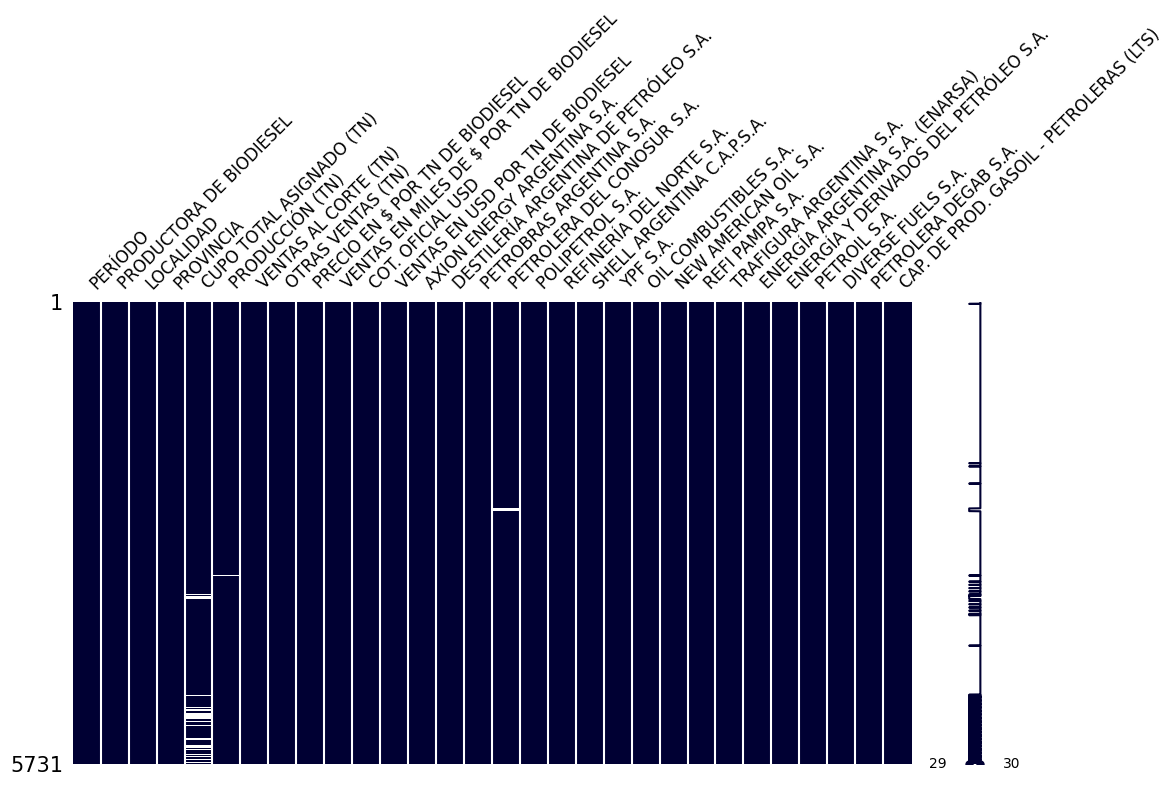

In [21]:
#Patrón de datos faltantes ¿En donde se localizan?
msno.matrix(biodiesel_df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Podemos observar, que existe un patrón de datos faltantes en la columna "CUPO TOTAL ASIGNADO (TN)" y que toma incidencia importante en los últimos años.

In [22]:
#Reemplazar valores NaN por 0:
biodiesel_df.fillna(0, inplace=True)
biodiesel_df.round(2)

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,3.88,178677.09,0.0,0.0,211.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,3.88,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,0.00,0.00,0.00,0.00,940334.0,0.00,846.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,846.00,271207.44,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,846.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.84,2925.96,3059.54,0.00,940334.0,2876989.49,846.00,3400696.79,1080.5,0.0,0.0,0.0,0.0,0.0,1979.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172115.29


Como fue expuesto al comienzo del análisis, el dataset fue obtenido de la página abierta de datos del gobierno.

No conocemos las causas por las cuales tenemos 365 datos NaN.

Pueden existir distintas causales:

*   Que hayan sido valores 0 que no han sido cargados o errores en el ingreso de datos.
*   Falta de información o imposibilidad de obtención del dato.

A los fines del presente trabajo, dejamos en claro su reemplazo en valor 0 para poder trabajar con las variables afectadas.

In [23]:
#Provincias con mayor cantidad de registros de producción de biodiesel:
biodiesel_df['PROVINCIA'].value_counts()

PROVINCIA
SANTA FE               2867
BUENOS AIRES           1543
ENTRE RÍOS              422
LA PAMPA                284
SAN LUIS                206
SANTIAGO DEL ESTERO     127
CÓRDOBA                  83
NEUQUÉN                  69
TUCUMÁN                  54
CHACO                    43
CABA                     33
Name: count, dtype: int64

In [24]:
#Localidades con mayor cantidad de registros de producción de biodiesel:
biodiesel_df[['LOCALIDAD', 'PROVINCIA']].value_counts()

LOCALIDAD                          PROVINCIA          
SAN LORENZO                        SANTA FE               1139
RAMALLO                            BUENOS AIRES            402
PILAR                              BUENOS AIRES            337
ARROYO SECO                        SANTA FE                266
ROSARIO                            SANTA FE                251
SAN LUIS                           SAN LUIS                168
ROLDÁN                             SANTA FE                168
GENERAL LAGOS                      SANTA FE                168
DTO. SAN MARTÍN                    SANTA FE                163
ALDEA MARÍA LUISA                  ENTRE RÍOS              162
DAIREAUX                           BUENOS AIRES            160
AVELLANEDA                         SANTA FE                158
CATRILÓ                            LA PAMPA                152
MALVINAS ARGENTINAS                BUENOS AIRES            147
ALVEAR                             SANTA FE                147


Se identifica que la producción de biodiesel, se encuentra radicada principalmente en Santa Fé y la provincia de Buenos Aires. En cuanto a localidades, San Lorenzo (Santa Fe) es la más destacada, seguida de Ramallo y Pilar (Buenos Aires).

In [25]:
#Medidas de estadística descriptiva del df:
biodiesel_df.describe(include='all').T.round(2)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
PERÍODO,5731,NaN,NaN,NaN,2017-12-10 16:29:13.830047232,2010-02-01 00:00:00,2014-09-01 00:00:00,2018-04-01 00:00:00,2021-05-01 00:00:00,2024-02-01 00:00:00,NaN
PRODUCTORA DE BIODIESEL,5731,54,ADVANCED ORGANIC MATERIALS S.A.,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCALIDAD,5731,38,SAN LORENZO,1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROVINCIA,5731,11,SANTA FE,2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUPO TOTAL ASIGNADO (TN),5731.0,NaN,NaN,NaN,2440.652958,0.0,561.65205,2436.0,4166.0,14500.0,1989.727562
PRODUCCIÓN (TN),5731.0,NaN,NaN,NaN,5028.553257,0.0,200.0,2250.0,4287.53,55405.6,8837.027326
VENTAS AL CORTE (TN),5731.0,NaN,NaN,NaN,2031.629483,0.0,0.0,1451.42,3894.88,14512.0,2096.287384
OTRAS VENTAS (TN),5731.0,NaN,NaN,NaN,30.0713,0.0,0.0,0.0,0.0,9682.61,324.471005
PRECIO EN $ POR TN DE BIODIESEL,5731.0,NaN,NaN,NaN,88526.458074,3276.0,6458.68,17957.0,92558.0,940334.0,165320.680272
VENTAS EN MILES DE $ POR TN DE BIODIESEL,5731.0,NaN,NaN,NaN,113081.330049,0.0,0.0,17761.097346,64945.80714,5200744.5259,322021.027259


Count: al reemplazar los valores NaN por 0, conseguimos que todas nuestras columnas tengan 5.731 registros o filas.

Mean: la media nos marca medidas muy interesantes. Podemos observar: que los cupos asignados a las PYMES fueron en promedio 2.441 tns, la producción promedio fue de 5.029 tons y las ventas en promedio superaron las 2.032 tns. Otra información importante la analizamos por el lado de las compras de las grandes petroleras: YPF lidera las compras en promedio con 1.188 tns, seguida por Shell con 307 tns, Axion con 305 tns y Petrobras con 74 tns. La media de capacidad productica de litros de gasoil fue de 295.797 litros. El corte del biodiesel respecto al gasoil es del 5%, lo cual nos dice que un litro de gasoil solo esta compuesto por 50 ml de biodiesel.

Max: el cupo máximo asignado fue 14.500 tns y la producción máxima fue de 55.406 tns. En cuanto a las ventas, la mayor en pesos fue de $5.200.744.530 y en dólares de 13.409.656 usd.

En la función "describe" podemos encontrar otras medidas de estadística descriptiva como el desvío estándar, mínimos, y análisis de cuartiles (25% , 50% y 75%).

Teniendo en cuenta todos los parámetros, la función "describe" de estadística descriptiva, nos define a "Advanced Organic Materials S.A." como la empresa top.

A su vez, nos confirma que San Lorenzo (Santa Fe) es la localidad donde se realizan la mayor cantidad de producciones.

In [26]:
#Top 5 empresas con mayor cupo de venta:
cupo_por_empresa = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['CUPO TOTAL ASIGNADO (TN)'].sum()
cupo_por_empresa_ordenada = cupo_por_empresa.sort_values(ascending=False)
empresas_mayores_cupos = cupo_por_empresa_ordenada.head(5).round(2)
print(empresas_mayores_cupos)

PRODUCTORA DE BIODIESEL
UNITEC BIO S.A.              853031.69
EXPLORA S.A.                 831215.45
DIASER S.A.                  749499.57
PATAGONIA BIOENERGIA S.A.    659535.90
ROSARIO BIOENERGY S.A.       626010.74
Name: CUPO TOTAL ASIGNADO (TN), dtype: float64


A lo largo del período analizado, UNITEC BIO S.A. ha tenido el cupo más alto de producción.

In [27]:
#Suma total de cupos de producción::
total_cupos = biodiesel_df['CUPO TOTAL ASIGNADO (TN)'].sum()
print("La suma total de cupos es:", total_cupos)

La suma total de cupos es: 13987382.102371912


El total de cupos de producción asciende a 13.987.382 tns de producción.

In [28]:
#Suma total de cupos de producción de las principales 5 empresas:
total_cupos_5_empresas = empresas_mayores_cupos.sum()
print("La suma total de cupos de las principales 5 empresas es:", total_cupos_5_empresas)

La suma total de cupos de las principales 5 empresas es: 3719293.3499999996


Las empresas del top 5 logran acaparar 3.719.293 tns.

In [29]:
#Suma cupos de producciones del resto de las empresas:
total_cupos_resto = total_cupos - total_cupos_5_empresas
print("La suma total de cupos del resto de las empresas es:", total_cupos_resto)

La suma total de cupos del resto de las empresas es: 10268088.752371913


El resto de empresas que no están en el top 5, suman 10.268.089 tns.

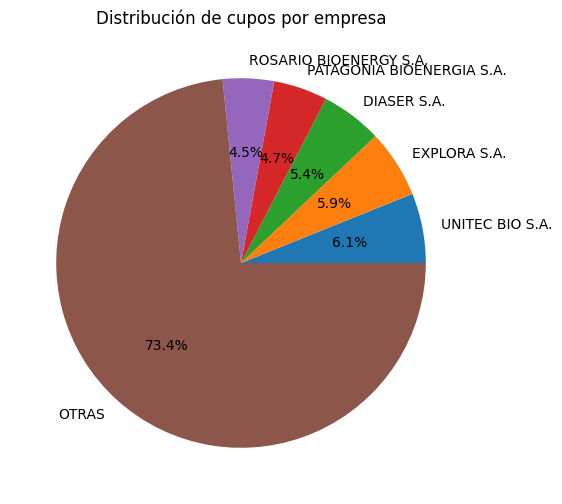

In [30]:
#Gráfico de distribución de cupos por empresa:
cupos = {
    'UNITEC BIO S.A.': 853031.69,
    'EXPLORA S.A. ': 831215.45,
    'DIASER S.A.': 749499.57,
    'PATAGONIA BIOENERGIA S.A.': 659535.90,
    'ROSARIO BIOENERGY S.A.': 626010.74,
    'OTRAS': 10268088.752371913}

sizes = [(cupos / total_cupos) * 100 for cupos in cupos.values()]
labels = list(cupos.keys())

plt.figure(figsize=(6, 6)) # Ajusta el tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # Hago el pieplot
plt.title('Distribución de cupos por empresa')
plt.show()

Las primeras 5 empresas tienen el 26,6% del mercado, el resto reparten el 73,4% restante.

In [31]:
#Índice de empresa con mayor cupo de ventas asignado:
indice_maximo = biodiesel_df['CUPO TOTAL ASIGNADO (TN)'].idxmax()
print("Índice del valor máximo en la columna 'cupo total asignado':", indice_maximo)

Índice del valor máximo en la columna 'cupo total asignado': 15


In [32]:
#Empresa con mayor cupo de ventas asignado:
biodiesel_df.iloc[15]

PERÍODO                                     2010-03-01 00:00:00
PRODUCTORA DE BIODIESEL                         UNITEC BIO S.A.
LOCALIDAD                                           SAN LORENZO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                14500.0
PRODUCCIÓN (TN)                                         9136.34
VENTAS AL CORTE (TN)                                    5515.04
OTRAS VENTAS (TN)                                           0.0
PRECIO EN $ POR TN DE BIODIESEL                          3389.0
VENTAS EN MILES DE $ POR TN DE BIODIESEL            18690.47056
COT. OFICIAL USD                                           3.89
VENTAS EN USD POR TN DE BIODIESEL                4804748.215938
AXION ENERGY ARGENTINA S.A.                              474.06
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

Unitec Bio SA fue la empresa con mayor cupo de venta asignado en marzo del 2010 con 14.500 tns.

In [33]:
#Top 5 empresas con mayores producciones:
produccion_por_empresa = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['PRODUCCIÓN (TN)'].sum()
produccion_por_empresa_ordenada = produccion_por_empresa.sort_values(ascending=False)
empresas_mayores_producciones = produccion_por_empresa_ordenada.head(5).round(2)
print(empresas_mayores_producciones)

PRODUCTORA DE BIODIESEL
L.D.C. S.A.                  4223910.80
T 6 INDUSTRIAL S.A.          4211755.75
RENOVA S.A.                  4052336.32
PATAGONIA BIOENERGIA S.A.    2693886.26
CARGILL S.A.                 1490679.50
Name: PRODUCCIÓN (TN), dtype: float64


L.D.C. S.A. es la empresa que más produjo en el período analizado con 4.223.911 tns.

In [34]:
#Suma total de producciones:
total_producciones = biodiesel_df['PRODUCCIÓN (TN)'].sum()
print("La suma total de producciones es:", total_producciones)

La suma total de producciones es: 28818638.714


El total de tns producidas asciende a 28.818.689.

In [35]:
#Suma total de producciones de las principales 5 empresas:
total_producciones_5_empresas = empresas_mayores_producciones.sum()
print("La suma total de producciones de las principales 5 empresas es:", total_producciones_5_empresas)

La suma total de producciones de las principales 5 empresas es: 16672568.63


Las principales 5 empresas produjeron 16.672.569 tns.

In [36]:
#Suma total de producciones del resto de las empresas:
total_producciones_resto = total_producciones - total_producciones_5_empresas
print("La suma total de producciones del resto de las empresas es:", total_producciones_resto)

La suma total de producciones del resto de las empresas es: 12146070.084


Por diferencia, obtenemos que el resto produjeron en total 12.146.070 tns.

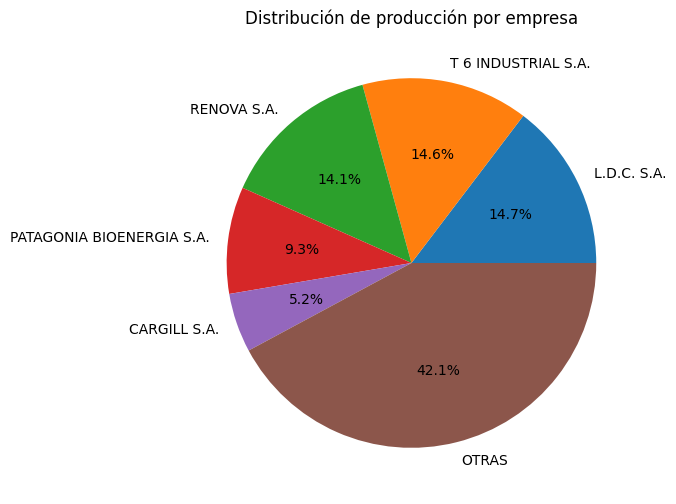

In [37]:
#Gráfico de distribución de producción por empresa:
producciones = {
    'L.D.C. S.A.': 4223910.80,
    'T 6 INDUSTRIAL S.A.': 4211755.75,
    'RENOVA S.A.': 4052336.32,
    'PATAGONIA BIOENERGIA S.A.': 2693886.26,
    'CARGILL S.A.': 1490679.50,
    'OTRAS': 12146070.084}

sizes = [(produccion / total_producciones) * 100 for produccion in producciones.values()]
labels = list(producciones.keys())

plt.figure(figsize=(6, 6)) # Ajusta el tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # Hago el pieplot
plt.title('Distribución de producción por empresa')
plt.show()

Las 5 empresas principales ocupan el 57,9% de las producciones totales. El resto 42,1%.

In [38]:
#Índice de empresa con mayor producción:
indice_maximo = biodiesel_df['PRODUCCIÓN (TN)'].idxmax()
print("Índice del valor máximo en la columna 'producción':", indice_maximo)

Índice del valor máximo en la columna 'producción': 2547


In [39]:
#Empresa con mayor producción:
biodiesel_df.iloc[2547]

PERÍODO                                     2017-07-01 00:00:00
PRODUCTORA DE BIODIESEL                             L.D.C. S.A.
LOCALIDAD                                         GENERAL LAGOS
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                    0.0
PRODUCCIÓN (TN)                                         55405.6
VENTAS AL CORTE (TN)                                        0.0
OTRAS VENTAS (TN)                                           0.0
PRECIO EN $ POR TN DE BIODIESEL                         13195.5
VENTAS EN MILES DE $ POR TN DE BIODIESEL                    0.0
COT. OFICIAL USD                                           17.0
VENTAS EN USD POR TN DE BIODIESEL                           0.0
AXION ENERGY ARGENTINA S.A.                                 0.0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

L.D.C. S.A., a su vez, fue la empresa con mayor pico de producción en julio del 2017 con 55.406 tns.


In [40]:
#Top 5 empresas con mayores ventas:
ventas_por_empresa = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['VENTAS AL CORTE (TN)'].sum()
ventas_por_empresa_ordenada = ventas_por_empresa.sort_values(ascending=False)
empresas_mayores_ventas = ventas_por_empresa_ordenada.head(5).round(2)
print(empresas_mayores_ventas)

PRODUCTORA DE BIODIESEL
UNITEC BIO S.A.              849125.28
EXPLORA S.A.                 785736.54
DIASER S.A.                  642590.77
PATAGONIA BIOENERGIA S.A.    620479.81
VILUCO S.A.                  564251.77
Name: VENTAS AL CORTE (TN), dtype: float64


Unitec Bio S.A. lidera las ventas en tns de biodiesel. En total vendió 849.125 tns.

In [41]:
#Suma total de ventas:
total_ventas = biodiesel_df['VENTAS AL CORTE (TN)'].sum()
print("La suma total de ventas es:", total_ventas)

La suma total de ventas es: 11643268.566649001


El total de tns vendidas asciende a 11.643.269 tns.

In [42]:
#Suma total de ventas de las principales 5 empresas:
total_ventas_5_empresas = empresas_mayores_ventas.sum()
print("La suma total de ventas de las principales 5 empresas es:", total_ventas_5_empresas)

La suma total de ventas de las principales 5 empresas es: 3462184.17


Las principales 5 empresas vendieron 3.462.184 tns.

In [43]:
#Suma total de ventas del resto de las empresas:
total_ventas_resto = total_ventas - total_ventas_5_empresas
print("La suma total de ventas del resto de las empresas es:", total_ventas_resto)

La suma total de ventas del resto de las empresas es: 8181084.396649001


Por diferencia, obtenemos que el resto vendieron en total 8.181.084 tns.

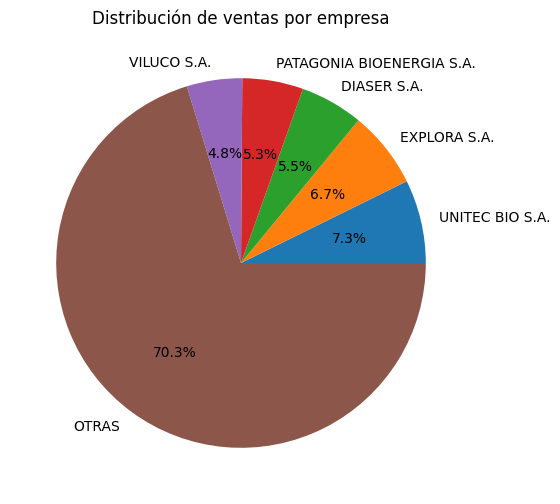

In [44]:
#Gráfico de distribución de ventas por empresa:
ventas = {
    'UNITEC BIO S.A.': 849125.28,
    'EXPLORA S.A.': 785736.54,
    'DIASER S.A.': 642590.77,
    'PATAGONIA BIOENERGIA S.A.': 620479.81,
    'VILUCO S.A.': 564251.77,
    'OTRAS': 8181084.396649001}

sizes = [(ventas / total_ventas) * 100 for ventas in ventas.values()]
labels = list(ventas.keys())

plt.figure(figsize=(6, 6)) # Ajusta el tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # Hago el pieplot
plt.title('Distribución de ventas por empresa')
plt.show()

Como podemos observar, no quiere decir que aquellas empresas que más produjeron son, a su vez, aquellas que más vendieron.

Sin embargo, algunas repiten en los top 5, como es el caso de "Unitec BIO S.A.",
"Patagonia Bioenergia S.A.", "Explora S.A.", "Diaser S.A.",

En el caso de las ventas, el top 5 solo representan el 29,70% del total, por lo que vemos que las ventas se encuentran distribuidas.

In [45]:
#Índice de empresa con mayor venta en tns:
indice_maximo = biodiesel_df['VENTAS AL CORTE (TN)'].idxmax()
print("Índice del valor máximo en la columna 'ventas':", indice_maximo)

Índice del valor máximo en la columna 'ventas': 3536


In [46]:
#Empresa con mayor venta en tns:
biodiesel_df.iloc[3536]

PERÍODO                                     2019-11-01 00:00:00
PRODUCTORA DE BIODIESEL                            CARGILL S.A.
LOCALIDAD                                               ROSARIO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                    0.0
PRODUCCIÓN (TN)                                         9803.75
VENTAS AL CORTE (TN)                                    14512.0
OTRAS VENTAS (TN)                                        256.24
PRECIO EN $ POR TN DE BIODIESEL                         38486.0
VENTAS EN MILES DE $ POR TN DE BIODIESEL             558508.832
COT. OFICIAL USD                                           63.5
VENTAS EN USD POR TN DE BIODIESEL                8795414.677165
AXION ENERGY ARGENTINA S.A.                                 0.0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

Cargill S.A., por su parte, obtuvo el mayor registro en venta en toneladas con 14.512 en noviembre del 2019.

In [47]:
#Top 5 empresas con mayores ventas facturadas en pesos:
ventas_por_empresa_en_pesos = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['VENTAS EN MILES DE $ POR TN DE BIODIESEL'].sum()
ventas_por_empresa_en_pesos_ordenada = ventas_por_empresa_en_pesos.sort_values(ascending=False)
empresas_mayores_ventas_en_pesos = ventas_por_empresa_en_pesos_ordenada.head(5).round(2)
print(empresas_mayores_ventas_en_pesos)

PRODUCTORA DE BIODIESEL
EXPLORA S.A.                 45851402.12
UNITEC BIO S.A.              44063072.68
PATAGONIA BIOENERGIA S.A.    39348203.69
DIASER S.A.                  31423095.57
ENERGÍA RENOVABLE S.A.       30867979.57
Name: VENTAS EN MILES DE $ POR TN DE BIODIESEL, dtype: float64


Explora S.A. lidera la facturación en pesos con $45.851.402.120.

In [48]:
#Índice de empresa con mayor venta en pesos:
indice_maximo = biodiesel_df['VENTAS EN MILES DE $ POR TN DE BIODIESEL'].idxmax()
print("Índice del valor máximo en la columna 'ventas en pesos':", indice_maximo)

Índice del valor máximo en la columna 'ventas en pesos': 5667


In [49]:
#Venta con mayor facturación en $ por parte de una PYME:
biodiesel_df.iloc[5667]

PERÍODO                                     2024-01-01 00:00:00
PRODUCTORA DE BIODIESEL                            EXPLORA S.A.
LOCALIDAD                                           SAN LORENZO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                            3642.492733
PRODUCCIÓN (TN)                                          5673.0
VENTAS AL CORTE (TN)                                    5631.01
OTRAS VENTAS (TN)                                        116.78
PRECIO EN $ POR TN DE BIODIESEL                        923590.0
VENTAS EN MILES DE $ POR TN DE BIODIESEL           5200744.5259
COT. OFICIAL USD                                         830.25
VENTAS EN USD POR TN DE BIODIESEL                  6264070.4919
AXION ENERGY ARGENTINA S.A.                             2001.42
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

Explora S.A. también facturó la mayor venta en pesos en enero del 2024, por un importe de $5.200.744.526.

In [50]:
#Top 5 empresas con mayores ventas facturadas en dólares:
ventas_por_empresa_en_dolares = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['VENTAS EN USD POR TN DE BIODIESEL'].sum()
ventas_por_empresa_en_dolares_ordenada = ventas_por_empresa_en_dolares.sort_values(ascending=False)
empresas_mayores_ventas_en_dolares = ventas_por_empresa_en_dolares_ordenada.head(5).round(2)
print(empresas_mayores_ventas_en_dolares)

PRODUCTORA DE BIODIESEL
UNITEC BIO S.A.              7.969260e+08
EXPLORA S.A.                 7.303039e+08
DIASER S.A.                  5.965523e+08
PATAGONIA BIOENERGIA S.A.    5.696476e+08
ROSARIO BIOENERGY S.A.       5.139086e+08
Name: VENTAS EN USD POR TN DE BIODIESEL, dtype: float64


Unitec BIO S.A. fue la empresa que más redito obtuvo en dólares con 796.926.031 usd.

In [51]:
#Índice de empresa con mayor venta en dólares:
indice_maximo = biodiesel_df['VENTAS EN USD POR TN DE BIODIESEL'].idxmax()
print("Índice del valor máximo en la columna 'ventas en dólares':", indice_maximo)

Índice del valor máximo en la columna 'ventas en dólares': 412


In [52]:
#Mayor venta en dólares estadounidenses <cotización oficial BNA>:
biodiesel_df.iloc[412]

PERÍODO                                     2011-11-01 00:00:00
PRODUCTORA DE BIODIESEL                     T 6 INDUSTRIAL S.A.
LOCALIDAD                                           SAN LORENZO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                    0.0
PRODUCCIÓN (TN)                                        25519.06
VENTAS AL CORTE (TN)                                   11508.63
OTRAS VENTAS (TN)                                           0.0
PRECIO EN $ POR TN DE BIODIESEL                         4975.33
VENTAS EN MILES DE $ POR TN DE BIODIESEL           57259.232098
COT. OFICIAL USD                                           4.27
VENTAS EN USD POR TN DE BIODIESEL               13409656.229016
AXION ENERGY ARGENTINA S.A.                                 0.0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

T 6 Industrial S.A. obtuvo la mayor venta en ventas en dólares con 13.409.656 usd noviembre del 2011.

Como observamos, si bien la venta más facturada en pesos perteneció a la empresa "Explora S.A.", la más valiosa en dólares norteamericanos fue de "T 6 Industrial S.A.".

In [53]:
#Cuantos litros totales de gasoil se pudieron producir con las ventas de tns de biodiesel:
biodiesel_df['CAP. DE PROD. GASOIL - PETROLERAS (LTS)'].sum()

1695214042.0

En total desde febrero 2010 a febrero 2024, las petroleras con las compras de tns de biodiesel, pudieron producir 1.695.214.042 litros de gasoil.



In [54]:
#Cual es el precio actual de biodiesel por tn en pesos:
biodiesel_df['PRECIO EN $ POR TN DE BIODIESEL'].tail(1)

5730    940334.0
Name: PRECIO EN $ POR TN DE BIODIESEL, dtype: float64

In [55]:
#Cual es el precio en pesos por tn de biodiesel que más se mantuvo en el tiempo:
biodiesel_df['PRECIO EN $ POR TN DE BIODIESEL'].mode()

0    44121.0
Name: PRECIO EN $ POR TN DE BIODIESEL, dtype: float64

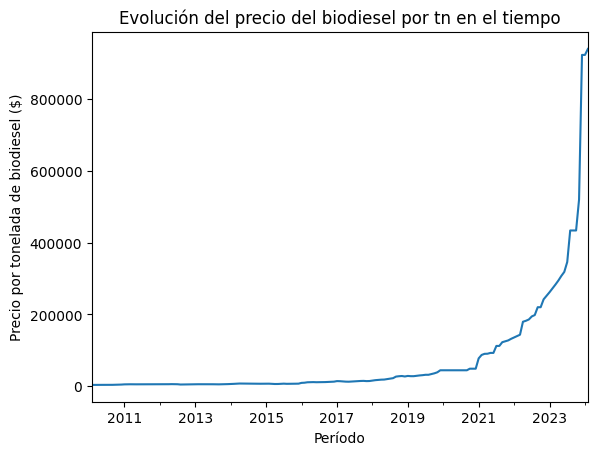

In [56]:
#Evolución del precio del biodiesel por tn en el tiempo:
precio_por_tn = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['PRECIO EN $ POR TN DE BIODIESEL'].mean()
precio_por_tn.plot.line()

plt.xlabel('Período')
plt.ylabel('Precio por tonelada de biodiesel ($)')
plt.title('Evolución del precio del biodiesel por tn en el tiempo')
plt.show()

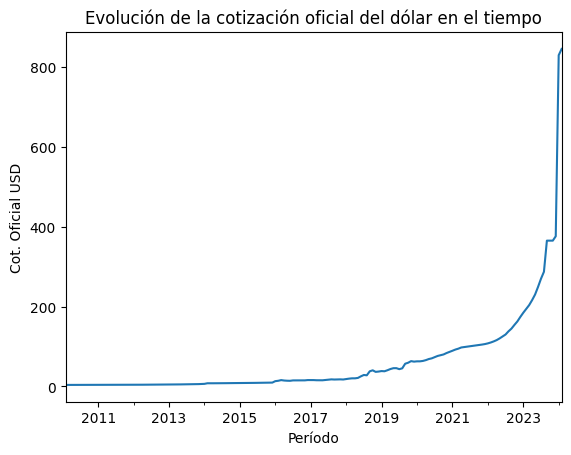

In [57]:
#Evolución de la cotización oficial del dólar en el tiempo:
cotizacion_oficial = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['COT. OFICIAL USD '].mean()
cotizacion_oficial.plot.line()

plt.xlabel('Período')
plt.ylabel('Cot. Oficial USD')
plt.title('Evolución de la cotización oficial del dólar en el tiempo')
plt.show()

Las gráficas nos permiten concluir que el precio del biodiesel a lo largo del tiempo ha acompañado la suba del dólar oficial.

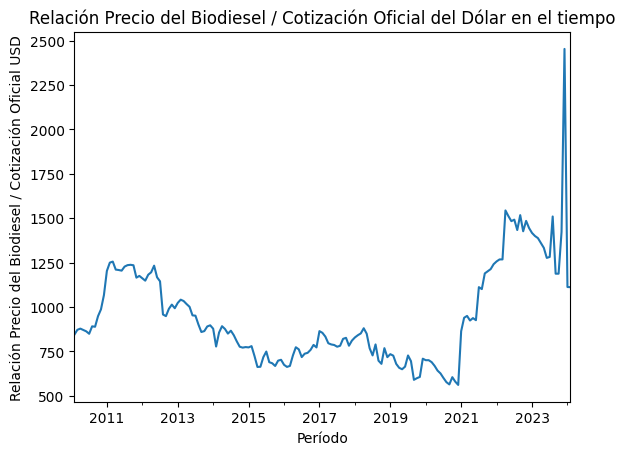

In [58]:
#Relación precio del biodiesel / cotización oficial del dólar para cada período:
relacion = precio_por_tn / cotizacion_oficial

# Graficar la relación en función del tiempo
relacion.plot.line()

plt.xlabel('Período')
plt.ylabel('Relación Precio del Biodiesel / Cotización Oficial USD')
plt.title('Relación Precio del Biodiesel / Cotización Oficial del Dólar en el tiempo')
plt.show()

No se observa una tendencia marcada a lo largo del tiempo. Nos demuestra que el pico más alto del precio de tn de biodiesel dolarizado fue a finales del 2023.

Esto quiere decir, que cuando existen picos altos, favorece a las empresas en sus ganancias ya que las ventas rinden más. Es decir, obtendrán mayores ganancias en ventas en dólar billete.

In [59]:
#Formato datetime python:
biodiesel_df['PERÍODO'] = pd.to_datetime(biodiesel_df['PERÍODO'])
biodiesel_df['PERÍODO'].describe()

count                             5731
mean     2017-12-10 16:29:13.830047232
min                2010-02-01 00:00:00
25%                2014-09-01 00:00:00
50%                2018-04-01 00:00:00
75%                2021-05-01 00:00:00
max                2024-02-01 00:00:00
Name: PERÍODO, dtype: object

In [60]:
biodiesel_df['PERÍODO'].dt.to_period('M')

0       2010-02
1       2010-02
2       2010-02
3       2010-02
4       2010-02
         ...   
5726    2024-02
5727    2024-02
5728    2024-02
5729    2024-02
5730    2024-02
Name: PERÍODO, Length: 5731, dtype: period[M]

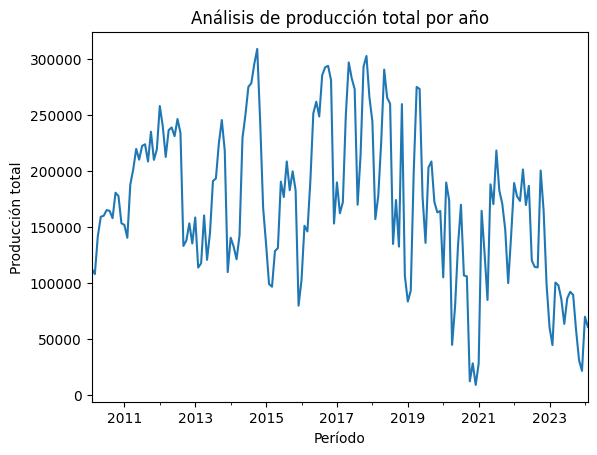

In [61]:
#Gráfico análisis de producción total por año:
produccion_por_año = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['PRODUCCIÓN (TN)'].sum()
produccion_por_año.plot.line()

plt.xlabel('Período')
plt.ylabel('Producción total')
plt.title('Análisis de producción total por año')
plt.show()

Text(0, 0.5, 'Producción en tns')

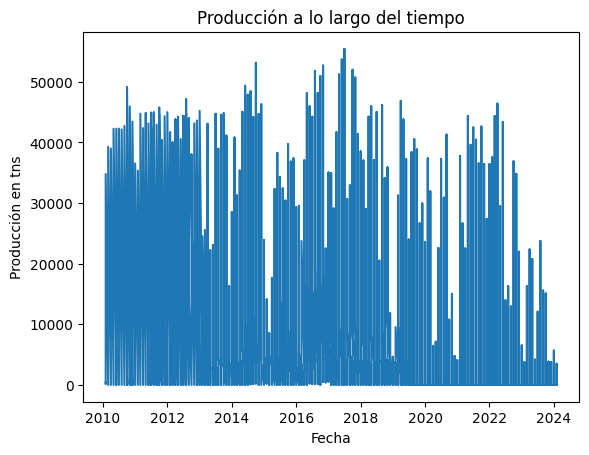

In [62]:
#Gráfico de análisis de producción en tns a lo largo del tiempo:
plt.plot(biodiesel_df['PERÍODO'], biodiesel_df['PRODUCCIÓN (TN)'])

plt.title('Producción a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción en tns')

Se observan variaciones irregulares a lo largo del tiempo, sin una tendencia marcada.

Los niveles más altos de producción estuvieron entre el 2014 y 2015, y en el período desde 2016 a 2019.

Por otra parte, los picos más bajos de producción fueron en la pandemia en los años 2020 y 2021, como así también se nota un decrecimiento importante a partir del 2022/2023.

La diferencia entre el primer y segundo gráfico tiene que ver que en el primer caso estamos sumando las cantidades producidas totales. Por lo que en el segundo gráfico, son los picos de producción individuales por día.


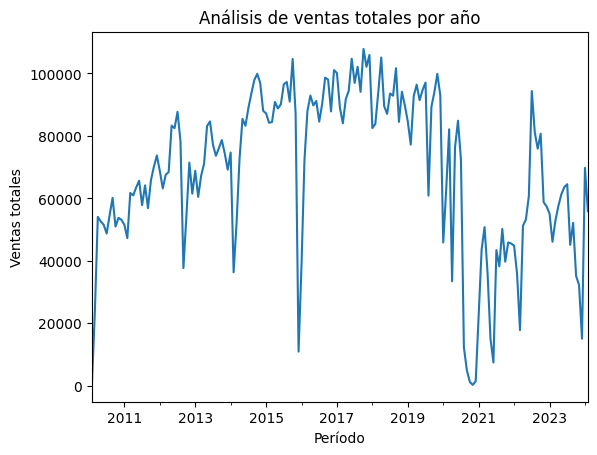

In [63]:
#Gráfico análisis de ventas totales por año:
produccion_por_año = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['VENTAS AL CORTE (TN)'].sum()
produccion_por_año.plot.line()

plt.xlabel('Período')
plt.ylabel('Ventas totales')
plt.title('Análisis de ventas totales por año')
plt.show()

Text(0, 0.5, 'Ventas en tns')

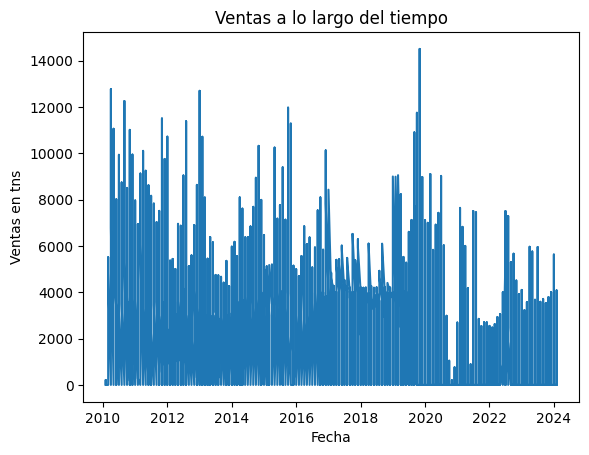

In [64]:
#Gráfico de análisis de ventas en tns a lo largo del tiempo:
plt.plot(biodiesel_df['PERÍODO'], biodiesel_df['VENTAS AL CORTE (TN)'])

plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas en tns')

En cuanto a las ventas, notamos también variaciones irregulares, los picos más altos sucedieron entre 2017 y 2019.

Por su parte, se ven niveles bajos muy marcados cerca del año 2016 y claramente también en pandemia en 2020 y 2021.

Post pandemia, no se identifica una tendencia sino también variaciones irregulares.

Nuevamente, la diferencia entre el primer y segundo gráfico tiene que ver que en el primer caso estamos sumando las ventas totales. Por lo que en el segundo gráfico, son los picos de ventas individuales por día.


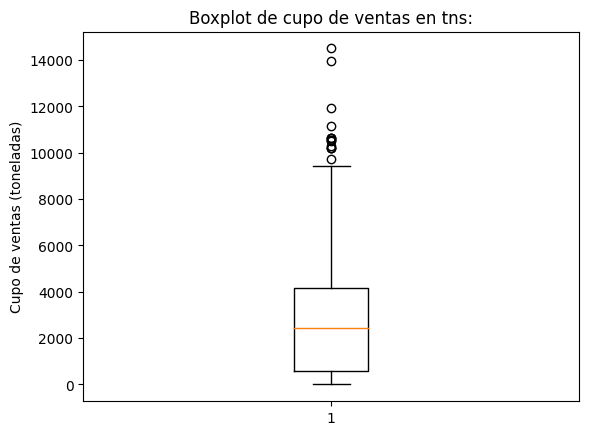

In [65]:
#Boxplot de cupos de ventas en tns:
plt.boxplot(biodiesel_df['CUPO TOTAL ASIGNADO (TN)'])

# Título y etiquetas:
plt.title('Boxplot de cupo de ventas en tns:')
plt.ylabel('Cupo de ventas (toneladas)')
plt.show()

El boxplot muestra que la mediana fue 2.441 tns y el máximo valor fue de 14.500 tns.

El máximo inlier supera las 9.000 tns, por encima de dicho valor, los considera outliers.


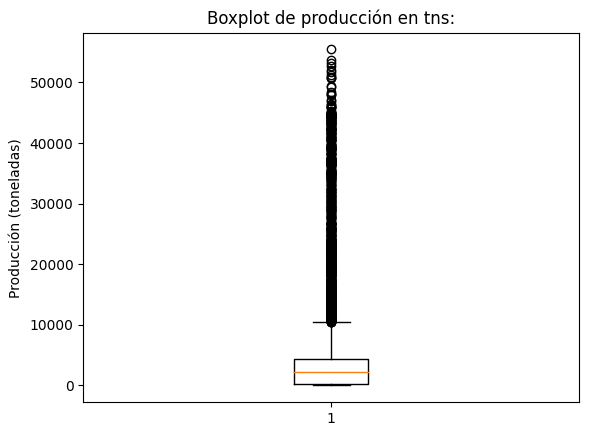

In [66]:
#Boxplot de producción en tns:
plt.boxplot(biodiesel_df["PRODUCCIÓN (TN)"])

# Título y etiquetas:
plt.title('Boxplot de producción en tns:')
plt.ylabel('Producción (toneladas)')
plt.show()

Como se logra observar en la gráfica, si bien la función "describe" nos determinó una mediana de 5.029 tns, también tenemos una producción máxima de 55.406 tns.

A su vez, nos indica que el máximo inlier es de aproximadamnete 10.000 tns. Por encima de ese valor, los reconoce como outliers.

Respecto a la gráfica anterior, vemos muchísimos más outliers, lo cual habla de la volatilidad de los datos. Considero no conveniente utilizar esta variable más adelante por la cantidad extrema de datos atípicos.
Creemos que se explica en función de la escala de producción a la que pueden producir las distintas empresas.

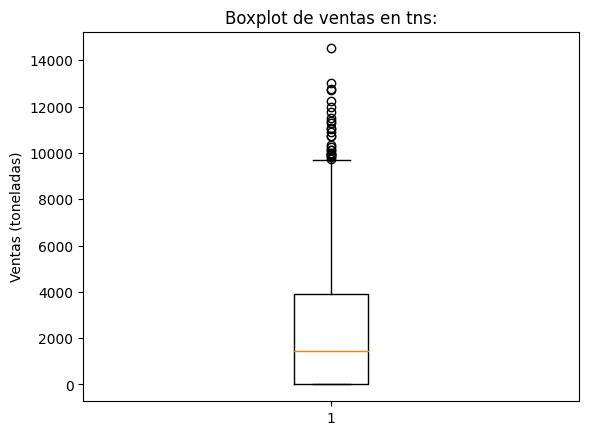

In [67]:
#Boxplot de cupos de producción en tns:
plt.boxplot(biodiesel_df['VENTAS AL CORTE (TN)'])

# Título y etiquetas:
plt.title('Boxplot de ventas en tns:')
plt.ylabel('Ventas (toneladas)')
plt.show()

En este caso, tenemos una mediana de 2.032 tns y un máximo de 14.512 tns de ventas.
Valores muy similares respecto a los obtenidos del cupo total de producción, por lo que también sus gráficas.
Los inliners también se encuentran cercanos a 9.500/10.000 tns.

En las 3 gráficas, encontramos obviamente solo outliers superiores, y ello tiene explicación en que no podemos tener una cantidad de tns negativas.
De acuerdo al análisis, el 50% central de los datos osciló de 0 a casi 4.000 tns tanto en cupo como ventas, y en la producción hasta las 6.000 tns aprox.


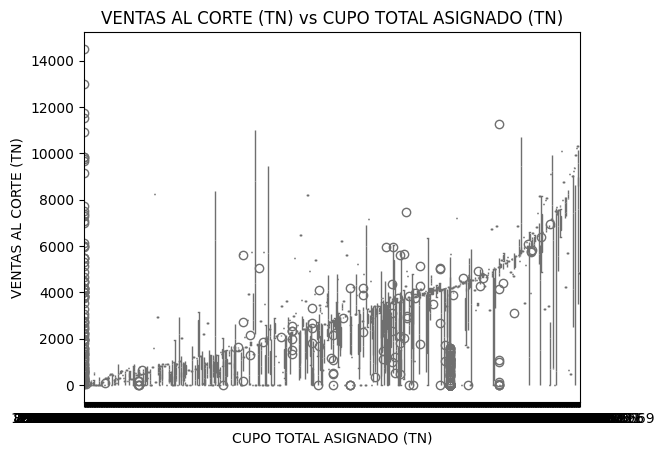

In [68]:
#Boxsplot de Seaborn para analizar la relación entre variables:
sns.boxplot(x='CUPO TOTAL ASIGNADO (TN)', y='VENTAS AL CORTE (TN)', data=biodiesel_df, color='skyblue')
plt.title("VENTAS AL CORTE (TN) vs CUPO TOTAL ASIGNADO (TN)")
plt.show()

El gráfico de seaborne nos muestra una correlación positiva entre el cupo de ventas asignado y las ventas totales.

**Feature Selection:**

Aplicaremos métodos de selección de características para reducir la dimensionalidad de nuestro dataset.

In [69]:
#Instalo versión 1.2.2 scikit-learn:
!pip install scikit-learn==1.2.2


In [70]:
X = biodiesel_df.drop(["VENTAS AL CORTE (TN)", "PERÍODO", "PRODUCTORA DE BIODIESEL", "LOCALIDAD", "PROVINCIA"], axis=1) # feature matrix
y = biodiesel_df['VENTAS AL CORTE (TN)'] # target feature

Nuestra variable target a predecir son las ventas en toneladas.
Excluimos del análisis a variables no numéricas que no son relevantes.

In [71]:
X

,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,0.000000,367.720,0.00,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.163059e+04
1,0.000000,20451.750,0.00,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.203044e+06
2,0.000000,6878.070,0.00,3276.0,6.932671e+02,3.88,1.786771e+05,0.0,0.0,211.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.045924e+05
3,0.000000,184.809,221.95,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.087112e+04
4,0.000000,8662.920,0.00,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.095835e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,0.000000,0.000,0.00,940334.0,0.000000e+00,846.00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
5727,937.173498,241.510,0.00,940334.0,2.294415e+05,846.00,2.712074e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,1.420647e+04
5728,0.000000,2865.510,0.00,940334.0,0.000000e+00,846.00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.685594e+05
5729,2602.843196,2925.960,0.00,940334.0,2.876989e+06,846.00,3.400697e+06,1080.5,0.0,0.0,0.0,0.0,0.0,1979.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.721153e+05


In [72]:
y

0          0.00
1          0.00
2        211.62
3          0.00
4          0.00
         ...   
5726       0.00
5727     244.00
5728       0.00
5729    3059.54
5730       0.00
Name: VENTAS AL CORTE (TN), Length: 5731, dtype: float64

In [73]:
#Forward selection:

import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    """
    params
      -data: Pandas DataFrame con las características
      -target: Pandas Series con la variable target
      -significance_level: Nivel de significancia para evaluar los coeficientes de las caracteríticas.
    return
      -best_features: lista con las características seleccionadas como mejores
    """
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


In [74]:
X.head()

,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,0.0,367.720,0.00,3276.0,0.00000,3.88,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.163059e+04
1,0.0,20451.750,0.00,3276.0,0.00000,3.88,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.203044e+06
2,0.0,6878.070,0.00,3276.0,693.26712,3.88,178677.092784,0.0,0.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.045924e+05
3,0.0,184.809,221.95,3276.0,0.00000,3.88,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.087112e+04
4,0.0,8662.920,0.00,3276.0,0.00000,3.88,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.095835e+05


In [75]:
forward_best_features = forward_selection(X,y,significance_level = 0.01)
forward_best_features

['YPF S.A.',
 'SHELL ARGENTINA C.A.P.S.A.',
 'VENTAS EN USD POR TN DE BIODIESEL',
 'AXION ENERGY ARGENTINA S.A.',
 'PETROBRAS ARGENTINA S.A.',
 'OIL COMBUSTIBLES S.A.',
 'TRAFIGURA ARGENTINA S.A.',
 'REFINERÍA DEL NORTE S.A.',
 'PETROLERA DEL CONOSUR S.A.',
 'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.',
 'REFI PAMPA S.A.',
 'NEW AMERICAN OIL S.A.',
 'PETROIL S.A.',
 'DIVERSE FUELS S.A.',
 'POLIPETROL S.A.',
 'ENERGÍA ARGENTINA S.A. (ENARSA)',
 'PETROLERA DEGAB S.A.',
 'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.']

El algoritmo de "Forward Selection" nos devolvió 18 columnas.

En nuestro caso, hemos especificado un nivel de significancia del 0.01 (o 1%), lo que significa que las características seleccionadas tienen un p-valor menor al 0.01 y se consideran estadísticamente significativas.

In [76]:
#Backward selection:

def backward_elimination(data, target,significance_level = 0.01):
    """
    params
      -data: Pandas DataFrame con las características
      -target: Pandas Series con la variable target
      -significance_level: Nivel de significancia para evaluar los coeficientes de las caracteríticas.
    return
      -best_features: lista con las características seleccionadas como mejores
    """
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [77]:
backward_best_features = backward_elimination(X,y,significance_level = 0.01)
backward_best_features

['AXION ENERGY ARGENTINA S.A.',
 'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.',
 'PETROBRAS ARGENTINA S.A.',
 'PETROLERA DEL CONOSUR S.A.',
 'POLIPETROL S.A.',
 'REFINERÍA DEL NORTE S.A.',
 'SHELL ARGENTINA C.A.P.S.A.',
 'YPF S.A.',
 'OIL COMBUSTIBLES S.A.',
 'NEW AMERICAN OIL S.A.',
 'REFI PAMPA S.A.',
 'TRAFIGURA ARGENTINA S.A.',
 'ENERGÍA ARGENTINA S.A. (ENARSA)',
 'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.',
 'PETROIL S.A.',
 'DIVERSE FUELS S.A.',
 'PETROLERA DEGAB S.A.']

"Backward Selection" nos devolvió también 17 columnas.

In [78]:
#Eliminación bidireccional (Stepwise):

def stepwise_selection(data, target,SL_in=0.01,SL_out = 0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [79]:
stepwise_best_features = stepwise_selection(X,y,SL_in=0.01,SL_out = 0.01)
stepwise_best_features

['YPF S.A.',
 'SHELL ARGENTINA C.A.P.S.A.',
 'AXION ENERGY ARGENTINA S.A.',
 'PETROBRAS ARGENTINA S.A.',
 'OIL COMBUSTIBLES S.A.',
 'TRAFIGURA ARGENTINA S.A.',
 'REFINERÍA DEL NORTE S.A.',
 'PETROLERA DEL CONOSUR S.A.',
 'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.',
 'REFI PAMPA S.A.',
 'NEW AMERICAN OIL S.A.',
 'PETROIL S.A.',
 'DIVERSE FUELS S.A.',
 'POLIPETROL S.A.',
 'ENERGÍA ARGENTINA S.A. (ENARSA)',
 'PETROLERA DEGAB S.A.',
 'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.']

"Stepwise" combina las dos anteriores, porque comienza con la selección hacia adelante pero además de agregar una nueva característica, verifica la importancia de las ya agregadas. En el caso de que alguna de las características seleccionadas sea insignificante la desecha con la eliminación hacia atrás.


In [80]:
#Comparativo de los 3 métodos de selección:

print('forward_best_features: ',len(forward_best_features), forward_best_features)
print('backward_best_features: ',len(backward_best_features), backward_best_features)
print('stepwise_best_features:a ',len(stepwise_best_features), stepwise_best_features)

forward_best_features:  18 ['YPF S.A.', 'SHELL ARGENTINA C.A.P.S.A.', 'VENTAS EN USD POR TN DE BIODIESEL', 'AXION ENERGY ARGENTINA S.A.', 'PETROBRAS ARGENTINA S.A.', 'OIL COMBUSTIBLES S.A.', 'TRAFIGURA ARGENTINA S.A.', 'REFINERÍA DEL NORTE S.A.', 'PETROLERA DEL CONOSUR S.A.', 'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.', 'REFI PAMPA S.A.', 'NEW AMERICAN OIL S.A.', 'PETROIL S.A.', 'DIVERSE FUELS S.A.', 'POLIPETROL S.A.', 'ENERGÍA ARGENTINA S.A. (ENARSA)', 'PETROLERA DEGAB S.A.', 'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.']
backward_best_features:  17 ['AXION ENERGY ARGENTINA S.A.', 'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.', 'PETROBRAS ARGENTINA S.A.', 'PETROLERA DEL CONOSUR S.A.', 'POLIPETROL S.A.', 'REFINERÍA DEL NORTE S.A.', 'SHELL ARGENTINA C.A.P.S.A.', 'YPF S.A.', 'OIL COMBUSTIBLES S.A.', 'NEW AMERICAN OIL S.A.', 'REFI PAMPA S.A.', 'TRAFIGURA ARGENTINA S.A.', 'ENERGÍA ARGENTINA S.A. (ENARSA)', 'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.', 'PETROIL S.A.', 'DIVERSE FUELS S.A.', 'PETROLERA DEGAB S.A.'

Como se observa, muchas empresas petroleras se repiten. Entre las 4 principales encontramos a YPF, AXION, SHELL y PETROBRAS.

Se podrían utilizar los datos para analizar el mercado petrolero en Argentina, identificar tendencias en las compras de biodiesel para su posterior corte con combustible fósil.

In [81]:
#Método de mínimos cuadrados ordinarios (OLS) - Forward selection:
model_forward = sm.OLS(y, sm.add_constant(X[forward_best_features])).fit()
print(model_forward.summary())

                             OLS Regression Results                             
Dep. Variable:     VENTAS AL CORTE (TN)   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 3.006e+09
Date:                  Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                          20:13:51   Log-Likelihood:                -5930.7
No. Observations:                  5731   AIC:                         1.190e+04
Df Residuals:                      5712   BIC:                         1.203e+04
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

R2 es 1 lo cual significa que el modelo explica el 100% de la variabilidad en las ventas al corte.

In [82]:
model_forward.pvalues

const                                    0.247018
YPF S.A.                                 0.000000
SHELL ARGENTINA C.A.P.S.A.               0.000000
VENTAS EN USD POR TN DE BIODIESEL        0.242300
AXION ENERGY ARGENTINA S.A.              0.000000
PETROBRAS ARGENTINA S.A.                 0.000000
OIL COMBUSTIBLES S.A.                    0.000000
TRAFIGURA ARGENTINA S.A.                 0.000000
REFINERÍA DEL NORTE S.A.                 0.000000
PETROLERA DEL CONOSUR S.A.               0.000000
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.    0.000000
REFI PAMPA S.A.                          0.000000
NEW AMERICAN OIL S.A.                    0.000000
PETROIL S.A.                             0.000000
DIVERSE FUELS S.A.                       0.000000
POLIPETROL S.A.                          0.000000
ENERGÍA ARGENTINA S.A. (ENARSA)          0.000000
PETROLERA DEGAB S.A.                     0.000000
ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.    0.000000
dtype: float64

Estos son los valores P correspondientes a cada coeficiente en el modelo de regresión lineal.

Un valor P menor que 0.05 generalmente se considera significativo, lo que sugiere que las características, son significativas para predecir la variable dependiente en este modelo.

In [170]:
#forward_best_features = forward_selection(X,y,significance_level = 0.01)
model_forward.pvalues<0.01

const                                    False
YPF S.A.                                  True
SHELL ARGENTINA C.A.P.S.A.                True
VENTAS EN USD POR TN DE BIODIESEL        False
AXION ENERGY ARGENTINA S.A.               True
PETROBRAS ARGENTINA S.A.                  True
OIL COMBUSTIBLES S.A.                     True
TRAFIGURA ARGENTINA S.A.                  True
REFINERÍA DEL NORTE S.A.                  True
PETROLERA DEL CONOSUR S.A.                True
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.     True
REFI PAMPA S.A.                           True
NEW AMERICAN OIL S.A.                     True
PETROIL S.A.                              True
DIVERSE FUELS S.A.                        True
POLIPETROL S.A.                           True
ENERGÍA ARGENTINA S.A. (ENARSA)           True
PETROLERA DEGAB S.A.                      True
ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.     True
dtype: bool

"True" indica que los coeficientes son significativos.

De modo que las características que han obtenido como resultado "True", son significativas para predecir las ventas al corte según el criterio de significancia (0.01).

In [84]:
#Método de mínimos cuadrados ordinarios (OLS) - Stepwise selection:
model_stepwise_best_features = sm.OLS(y, sm.add_constant((X[stepwise_best_features]))).fit()
print(model_stepwise_best_features.summary())

                             OLS Regression Results                             
Dep. Variable:     VENTAS AL CORTE (TN)   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 3.182e+09
Date:                  Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                          20:14:13   Log-Likelihood:                -5931.4
No. Observations:                  5731   AIC:                         1.190e+04
Df Residuals:                      5713   BIC:                         1.202e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [85]:
# stepwise_best_features = stepwise_selection(X,y,SL_in=0.01,SL_out = 0.01)
model_stepwise_best_features.pvalues<0.01

const                                    False
YPF S.A.                                  True
SHELL ARGENTINA C.A.P.S.A.                True
AXION ENERGY ARGENTINA S.A.               True
PETROBRAS ARGENTINA S.A.                  True
OIL COMBUSTIBLES S.A.                     True
TRAFIGURA ARGENTINA S.A.                  True
REFINERÍA DEL NORTE S.A.                  True
PETROLERA DEL CONOSUR S.A.                True
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.     True
REFI PAMPA S.A.                           True
NEW AMERICAN OIL S.A.                     True
PETROIL S.A.                              True
DIVERSE FUELS S.A.                        True
POLIPETROL S.A.                           True
ENERGÍA ARGENTINA S.A. (ENARSA)           True
PETROLERA DEGAB S.A.                      True
ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.     True
dtype: bool

In [86]:
!pip install mlxtend

In [87]:
# Sequential Forward Selection(sfs)

import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features=5, #Cantidad de features a devolver
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [88]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('VENTAS EN USD POR TN DE BIODIESEL',
 'AXION ENERGY ARGENTINA S.A.',
 'PETROBRAS ARGENTINA S.A.',
 'SHELL ARGENTINA C.A.P.S.A.',
 'YPF S.A.')

Entre las features determinados se encuentran las principales petroleras de Argentina.

**Modelos de regresión:**

Si bien los métodos de selección de características coincidieron en que las más representativas para predecir a las ventas son las compras de petroleras, ello se traduce en que la variable ventas es la sumatoria de las compras.

Por lo que he decidido desechar las anteriores y utilizar la variable "Cupo de ventas" como predictor de nuestra variable target.

Como se anunció antes, la varible "Producción" la analizaremos pero no la tomaremos como predictora por la cantidad de outliers que posee.

Implementaré dos modelos de regresión lineal utilizados en Python: statsmodels y scikit-learn.

In [181]:
#Modelo de Regresión Lineal Ordinaria (OLS) utilizando "Statsmodels":

import statsmodels.formula.api as smf

model1 = 'Q("VENTAS AL CORTE (TN)") ~ Q("CUPO TOTAL ASIGNADO (TN)")'
lm1 = smf.ols(formula=model1, data=biodiesel_df).fit()
print(lm1.summary())

                                OLS Regression Results                               
Dep. Variable:     Q("VENTAS AL CORTE (TN)")   R-squared:                       0.553
Model:                                   OLS   Adj. R-squared:                  0.553
Method:                        Least Squares   F-statistic:                     7094.
Date:                       Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                               22:15:36   Log-Likelihood:                -49653.
No. Observations:                       5731   AIC:                         9.931e+04
Df Residuals:                           5729   BIC:                         9.932e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Aplicando el Modelo de Regresión Lineal Ordinaria (OLS) obtenemos algunos datos interesantes.

En este caso, analizamos la relación entre dos variables de nuestro dataset: "cupo total de venta asignado" como variable independiente y "ventas al corte" como variable dependiente.

El coeficiente de determinación (R-cuadrado) es 0.553, lo que significa que alrededor del 55.3% de la variabilidad en las ventas al corte puede explicarse por el modelo de regresión lineal ajustado.

El coeficiente para "CUPO TOTAL ASIGNADO (TN)" es 0.7836. Esto significa que, en promedio, un aumento de una tonelada en el cupo total asignado está asociado con un aumento de 0.7836 toneladas en las ventas al corte.

El p-valor para el coeficiente de "CUPO TOTAL ASIGNADO (TN)" es menor a 0,05, esto sugiere que la variable es estadísticamente significativa para predecir las ventas al corte.

El intercepto es 119.1026. Esto representa el valor esperado de las ventas al corte cuando todas las demás variables en el modelo son cero. Significa que las ventas de base son 119 tns.



In [184]:
#Modelo integrado teniendo en cuenta más de una variable:

model2 = 'Q("VENTAS AL CORTE (TN)") ~ Q("CUPO TOTAL ASIGNADO (TN)") + Q("PRODUCCIÓN (TN)") + Q("OTRAS VENTAS (TN)")'
lm2 = smf.ols(formula=model2, data=biodiesel_df).fit()
print(lm2.summary())

                                OLS Regression Results                               
Dep. Variable:     Q("VENTAS AL CORTE (TN)")   R-squared:                       0.571
Model:                                   OLS   Adj. R-squared:                  0.571
Method:                        Least Squares   F-statistic:                     2541.
Date:                       Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                               22:16:55   Log-Likelihood:                -49536.
No. Observations:                       5731   AIC:                         9.908e+04
Df Residuals:                           5727   BIC:                         9.911e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

En este caso de análisis, agregamos a las variables "Producción" y "Otras Ventas". Sin embargo, vemos que R-cuadrado sigue prácticamente con el mismo valor que antes, por lo que queda demostrado que no inciden sobre las ventas.

In [185]:
#Modelo de regresión utilizando "Scikit-learn":

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = biodiesel_df.drop(['VENTAS AL CORTE (TN)'], axis=1)
y = biodiesel_df['VENTAS AL CORTE (TN)']

In [186]:
x

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,DESTILERÍA ARGENTINA DE PETRÓLEO S.A.,PETROBRAS ARGENTINA S.A.,PETROLERA DEL CONOSUR S.A.,POLIPETROL S.A.,REFINERÍA DEL NORTE S.A.,SHELL ARGENTINA C.A.P.S.A.,YPF S.A.,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.000000,367.720,0.00,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.163059e+04
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.000000,20451.750,0.00,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.203044e+06
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.000000,6878.070,0.00,3276.0,6.932671e+02,3.88,1.786771e+05,0.0,0.0,211.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.045924e+05
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.000000,184.809,221.95,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.087112e+04
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.000000,8662.920,0.00,3276.0,0.000000e+00,3.88,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.095835e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,0.000000,0.000,0.00,940334.0,0.000000e+00,846.00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.173498,241.510,0.00,940334.0,2.294415e+05,846.00,2.712074e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,1.420647e+04
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.000000,2865.510,0.00,940334.0,0.000000e+00,846.00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.685594e+05
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.843196,2925.960,0.00,940334.0,2.876989e+06,846.00,3.400697e+06,1080.5,0.0,0.0,0.0,0.0,0.0,1979.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.721153e+05


In [190]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
   test_size= 0.3, #Entrenamiento: 70%; Testeo/prueba: 30%
   random_state=0)

In [191]:
X_train_num = X_train[['CUPO TOTAL ASIGNADO (TN)','PRODUCCIÓN (TN)','OTRAS VENTAS (TN)']]
X_test_num = X_test[['CUPO TOTAL ASIGNADO (TN)','PRODUCCIÓN (TN)','OTRAS VENTAS (TN)']]

In [195]:
# Creamos el objeto de regresión lineal
lr = LinearRegression().fit(X_train_num, y_train)
# Entrenamos el modelo
lr.score(X_train_num, y_train)

0.5659552164001613

Un coeficiente de determinación R2 de 0.5659 indica que el modelo de regresión lineal ajustado explica alrededor del 56.60% de la variabilidad de la variable dependiente en los datos de entrenamiento.

El valor sugiere que el modelo tiene un buen ajuste a los datos de entrenamiento.

Es un R2 muy similar al obtenido con la librería "Statsmodels".

En este caso, es un coeficiente utilizando los datos de entrenamiento (X_train_num, y_train).


In [196]:
# Predecimos en test
y_pred = lr.predict(X_test_num)
y_pred_train = lr.predict(X_train_num)

In [198]:
# Coeficientes
print("Coeficientes: \n", lr.coef_)

Coeficientes: 
 [0.7818272  0.0318527  0.17458798]


Coeficientes obtenidos:


*   'CUPO TOTAL ASIGNADO (TN)': 0.782. Muy significativa.
*   'PRODUCCIÓN (TN)': 0.032. No es significativa.
*   'OTRAS VENTAS (TN)': 0.175. Algo singnificativa.

Como observamos de acuerdo a los coeficientes obtenidos, solo la variable "Cupo de ventas" es significativa como variable predictora de las ventas.



In [203]:
#Métricas para analizar el modelo:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Utilizamos la función sqrt de Numpy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1772088.4372589877
Root Mean Squared Error (RMSE): 1331.1981209643393
Mean Absolute Error (MAE): 830.6230393596825
R^2 Score: 0.583248066913832


MSE/RMSE: Indican cuán cerca están los puntos de datos observados de los valores predichos del modelo.
MSE infla mucho los errores porque los eleva al cuadrado.
El resultado arroja un valor muy alto, que penaliza teniendo tantos outliers como en nuestro dataset.
En conclusión, MSE no nos sirve como métrica y RMSE podría considerse en conjunto con otras.

MAE: Es la diferencia absoluta entre el valor objetivo y el valor predicho por el modelo. En este caso, el resultado es un número más razonable, debido a que MAE es más robusto a los valores atípicos.

R^2: Indica la bondad o la aptitud del modelo. Muestra que tan bien las variables independientes seleccionadas explican la variabilidad en sus variables dependientes. Mientras MAE y MSE dependen del contexto, la puntuación R2 es independiente del mismo.
El resultado 0.5832 es un R^2 relativamente alto.

Las métricas sugieren que el modelo tiene un buen rendimiento en el conjunto de prueba.

In [116]:
lr.score(X_test_num,y_test)


0.583248066913832

En este último R^2 obtenido utilizamos los datos de testeo (X_test_num,y_test).



Los R^2 utilizando "Statsmodel" y "Scikit-learn" obtuvieron valores similires entre 55% y 58%.

**PCA:**

Utilizaremos el Análisis de Componentes Principales (PCA) como técnica de reducción de dimensionalidad para simplificar conjuntos de datos de muchas características (o variables) en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales.

In [144]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aplicamos PCA a nuestro dataset "biodiesel_df":

# Paso 1: Estandarizar los datos
scaler = StandardScaler()
biodiesel_df_numeric = biodiesel_df.drop(columns=['PERÍODO', 'PRODUCTORA DE BIODIESEL','LOCALIDAD','PROVINCIA', 'PRECIO EN $ POR TN DE BIODIESEL', 'VENTAS EN MILES DE $ POR TN DE BIODIESEL', 'COT. OFICIAL USD ', 'VENTAS EN USD POR TN DE BIODIESEL', 'AXION ENERGY ARGENTINA S.A.','DESTILERÍA ARGENTINA DE PETRÓLEO S.A.','PETROBRAS ARGENTINA S.A.','PETROLERA DEL CONOSUR S.A.','POLIPETROL S.A.','REFINERÍA DEL NORTE S.A.','SHELL ARGENTINA C.A.P.S.A.','YPF S.A.','OIL COMBUSTIBLES S.A.','NEW AMERICAN OIL S.A.','REFI PAMPA S.A.','TRAFIGURA ARGENTINA S.A.','ENERGÍA ARGENTINA S.A. (ENARSA)','ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.','PETROIL S.A.','DIVERSE FUELS S.A.','PETROLERA DEGAB S.A.','CAP. DE PROD. GASOIL - PETROLERAS (LTS)'])
scaled_data = scaler.fit_transform(biodiesel_df_numeric)

# Paso 2: Aplicar PCA
pca = PCA(n_components=2)  # Especifica el número de componentes principales deseados
principal_components = pca.fit_transform(scaled_data)

# Paso 3: Crear un nuevo DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Eliminamos del análisis todas las columnas numéricas y no noméricas que no nos servían.

Ahora, 'principal_df' contiene los datos transformados por PCA con dos componentes principales.

In [145]:
principal_df

,PC1,PC2
0,-1.617266,-0.209494
1,-1.249899,1.323356
2,-1.427042,0.285313
3,-1.607125,0.269842
4,-1.465534,0.423611
...,...,...
5726,-1.623992,-0.237559
5727,-1.212231,-0.295684
5728,-1.571577,-0.018858
5729,0.361563,-0.250222


In [146]:
principal_df.shape

(5731, 2)

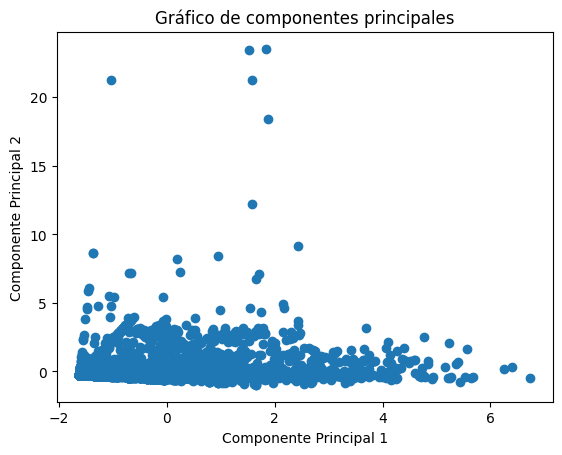

In [147]:
#Grafica de los componentes principales:
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de componentes principales')
plt.show()

Se observa correlación entre PC1 y PC2.

Sin embargo, también observamos muchos outliers que provienen de la variable "Producción".

In [149]:
#Varianza explicada:
print("Varianza explicada PC1 y PC2:", pca.explained_variance_)

Varianza explicada PC1 y PC2: [1.76401008 1.10878192]


PC1 explica 1.764 unidades de varianza y PC2 explica 1.108 unidades de varianza en los datos originales.

Un eigenvalor > 1 indica que la componente principal explica más varianza de lo que lo hace una de las variables originales, estando los datos estandarizados.

In [154]:
#Ratio de varianza explicada acumulativa:
print("Ratios PC1 y PC2:", pca.explained_variance_ratio_)

Ratios PC1 y PC2: [0.44092557 0.27714711]


El primer componente principal (PC1) explica aproximadamente el 44.09% de la varianza en los datos, mientras que el segundo componente principal (PC2) explica alrededor del 27.71%.

In [156]:
#Varianza explicada acumulativa:
ratios = pd.Series([0.44092557, 0.27714711])

# Calcula la varianza explicada acumulativa
var_exp_cumulative = ratios.cumsum()

# Imprime los resultados
print("Varianza explicada acumulativa:", var_exp_cumulative)

Varianza explicada acumulativa: 0    0.440926
1    0.718073
dtype: float64


La varianza explicada acumulativa con 2 componentes principales es del 71,81%:

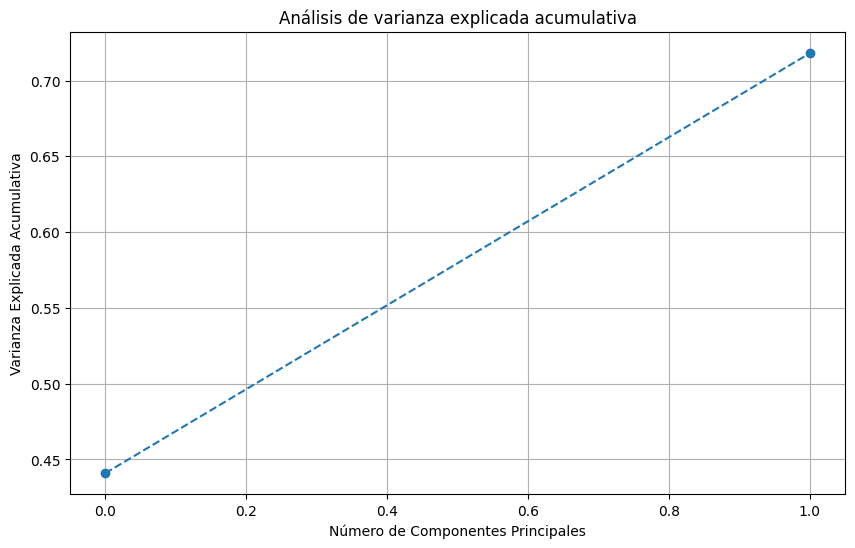

In [157]:
#Grafica de la varianza explicada acumulativa:
plt.figure(figsize=(10, 6))
var_exp_cumulative.plot(marker='o', linestyle='--')
plt.title('Análisis de varianza explicada acumulativa')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()

La gráfica muestra una recta con pendiente positiva, esto significa que la varianza explicada acumulativa aumenta a medida que se consideran más componentes principales.

In [158]:
#¿Que pasa si agregamos 2 componentes principales más?:
pca = PCA(n_components=4)  # Cambia el número de componentes principales deseado
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4'])

In [159]:
principal_df

,PC1,PC2,PC3,PC4
0,-1.617266,-0.209494,0.138602,0.229059
1,-1.249899,1.323356,-1.478175,-0.030888
2,-1.427042,0.285313,-0.382792,0.216352
3,-1.607125,0.269842,0.626801,0.214503
4,-1.465534,0.423611,-0.529166,0.121694
...,...,...,...,...
5726,-1.623992,-0.237559,0.168204,0.233818
5727,-1.212231,-0.295684,0.208158,-0.014497
5728,-1.571577,-0.018858,-0.062471,0.196730
5729,0.361563,-0.250222,0.127932,0.320367


In [160]:
principal_df.shape

(5731, 4)

In [161]:
#Varianza explicada:
print("Varianza explicada PC1, PC2, PC3 y PC4:", pca.explained_variance_)

Varianza explicada PC1, PC2, PC3 y PC4: [1.76401008 1.10878192 0.88262786 0.24527822]


In [162]:
#Ratio de varianza explicada acumulativa:
print("Ratios PC1, PC2, PC3 y PC4:", pca.explained_variance_ratio_)

Ratios PC1, PC2, PC3 y PC4: [0.44092557 0.27714711 0.22061846 0.06130886]


El tercer componente principal (PC3) explica el 22.06% de la varianza en los datos, mientras que el cuarto componente principal (PC4) explica el 6.13%.

In [163]:
#Varianza explicada acumulativa:
ratios = pd.Series([0.44092557, 0.27714711, 0.22061846, 0.06130886])

# Calcula la varianza explicada acumulativa
var_exp_cumulative = ratios.cumsum()

# Imprime los resultados
print("Varianza explicada acumulativa:", var_exp_cumulative)

Varianza explicada acumulativa: 0    0.440926
1    0.718073
2    0.938691
3    1.000000
dtype: float64


Juntos, PC1, PC2, PC3 y PC4 explican el 100% de la varianza total en los datos.

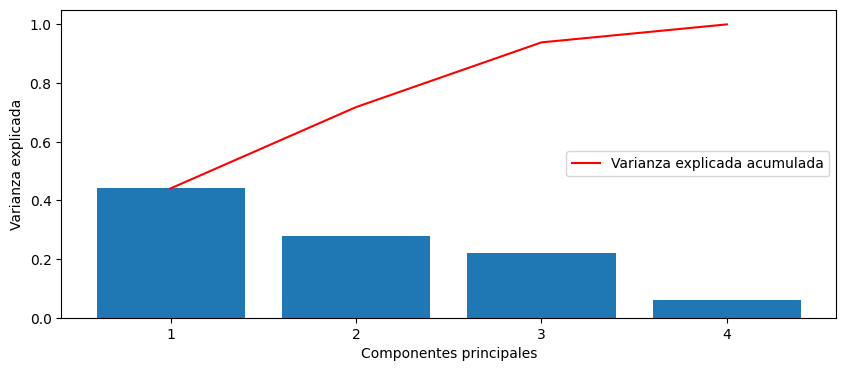

In [164]:
my_ticks = range(1,len(pca.explained_variance_ratio_ )+1)

plt.figure(figsize=(10, 4))
plt.bar(my_ticks,pca.explained_variance_ratio_ )
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.plot(my_ticks,
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Varianza explicada acumulada")
plt.xticks(my_ticks, my_ticks)
plt.legend(loc='right')

In [165]:
#Obtenemos los vectores de peso de los componentes principales:
componentes_principales = pca.components_

# Creamos un DataFrame para mostrar los pesos de las características en cada componente principal
df_componentes = pd.DataFrame(componentes_principales, columns=biodiesel_df_numeric.columns,index=['PC1','PC2','PC3','PC4'])
print(df_componentes)

     CUPO TOTAL ASIGNADO (TN)  PRODUCCIÓN (TN)  VENTAS AL CORTE (TN)  \
PC1                  0.690630         0.161628              0.704641   
PC2                 -0.157448         0.674399             -0.020550   
PC3                  0.119502        -0.711324              0.026671   
PC4                 -0.695672        -0.114367              0.708765   

     OTRAS VENTAS (TN)  
PC1           0.019715  
PC2           0.721092  
PC3           0.692117  
PC4          -0.024738  


In [166]:
print(df_componentes.shape)

(4, 4)


In [167]:
df_componentes.head()

,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN)
PC1,0.690630,0.161628,0.704641,0.019715
PC2,-0.157448,0.674399,-0.020550,0.721092
PC3,0.119502,-0.711324,0.026671,0.692117
PC4,-0.695672,-0.114367,0.708765,-0.024738


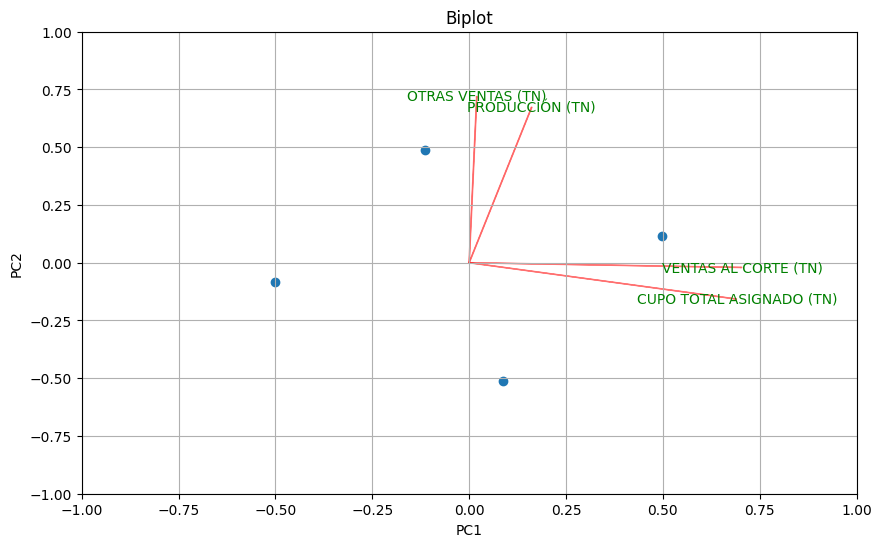

In [169]:
#Biplot de los componentes principales:

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(10, 6))
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5, length_includes_head=True)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title ('Biplot')
    plt.grid()

# Llamar a la función biplot
biplot(componentes_principales, np.transpose(pca.components_), labels=df_componentes.columns)

# Mostrar el gráfico
plt.show()

Las variables que apuntan en la misma dirección están correlacionadas positivamente, mientras que las variables que apuntan en direcciones opuestas están correlacionadas negativamente.

Podemos identificar 2 grupos de variables que están relacionados entre sí:


1.   Ventas al corte (TN) y Cupo total asignado (TN).
2.   Otras ventas (TN) y Producción (TN).

Por su parte, el ángulo entre dos flechas indica la correlación entre las variables representadas por esas flechas. Un ángulo pequeño indica una correlación positiva, mientras que un ángulo grande indica una correlación negativa.

